In [1]:
import re
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt

In [2]:
# Sample false positives load from txt file where separated by newline
with open("exp_output/model_FPs.txt", "r") as file:
    false_positives = file.read().splitlines()
false_positives

['gse15459',
 'gse26899',
 'gse66229',
 'pxd008840',
 'gse15460',
 'https://github.com/evolved-bio/invitromuscledystrophyanchoredcellsheet',
 '8bi6',
 '8bi5',
 'https://doi.org/10.5061/dryad.h70rxwdmj',
 '10.17632/yyr73pf4pt.3',
 'pxd022824',
 'tcga',
 'gtex',
 'pxd058648',
 'gse140135',
 'gse148625',
 'gse84881',
 'mtbls11979',
 'prjna1178314',
 'pxd051587',
 'gse273052',
 'zgv3gpshpv.1',
 'gse198191',
 'mtbls12185',
 'phs000424.v10.p2',
 'gse247291',
 '10.5281/zenodo.10993216',
 'at5g43940',
 'at4g35090',
 'at1g20620',
 'at1g19890',
 'cp029003.1',
 '6wm4',
 '6vq8',
 'srp017778',
 'srp059242',
 '6wm3',
 '6wm2',
 'srp033517',
 'pxd051662',
 'prjna1163675',
 'prjna1031176',
 'gse273221',
 '10.5281/zenodo.12772115',
 'pxd040855',
 'gse139018',
 'mieandersen/sleep_ne_app_ps1',
 'mannlabs/ckg',
 '7obt',
 '7ob5',
 '7ob8',
 '7obs',
 '7obh',
 '7obd',
 '7oby',
 '7obc',
 '7obl',
 '7obx',
 'gse202350',
 '7obg',
 '7obk',
 'pr002076',
 'e-mtab-13537',
 'prjna746094',
 'msv000087817',
 'pxd057514',

In [3]:
 # Define regex patterns for repositories
repo_patterns = {
    'PRIDE': r'^pxd\d+$',
    'MassIVE': r'^MSV\d+$',
    'GEO': r'^gse\d+$',
    'EGA': r'^egas\d+$',
    'dbGaP': r'^phs',
    'GenBank': r'^cp\d+\.\w+$',
    'BioProject': r'^prjna\d+$',
    'Zenodo': r'.*zenodo.*',
    'dryad': r'^10\.\d+/dryad\.\w+$',
    'Mendeley': r'10\.\d+/\w+\d+\w+\.\d+',
    'SRA': r'^srp\d+$|^dra\d+^srr\d+',
    'Metabolights': r'^mtbls\d+$',
    'ArrayExpress': r'^e\-mtab\-\d+$',
    'GitHub': r'^https?://github\.com/',
    'PDB': r'^pdb\-\w+$',
    'EMDB': r'^emd\-\d+$',
    'TCGA': r'^tcga',
    'GTEx': r'^gtex',
    'HGNC': r'^hgnc',
}

# Classify false positives and count frequencies
repo_counts = defaultdict(int)

for fp in false_positives:
    classified = False
    for repo, pattern in repo_patterns.items():
        if re.match(pattern, fp, re.IGNORECASE):
            repo_counts[repo] += 1
            classified = True
            break
    if not classified:
        repo_counts['Other'] += 1

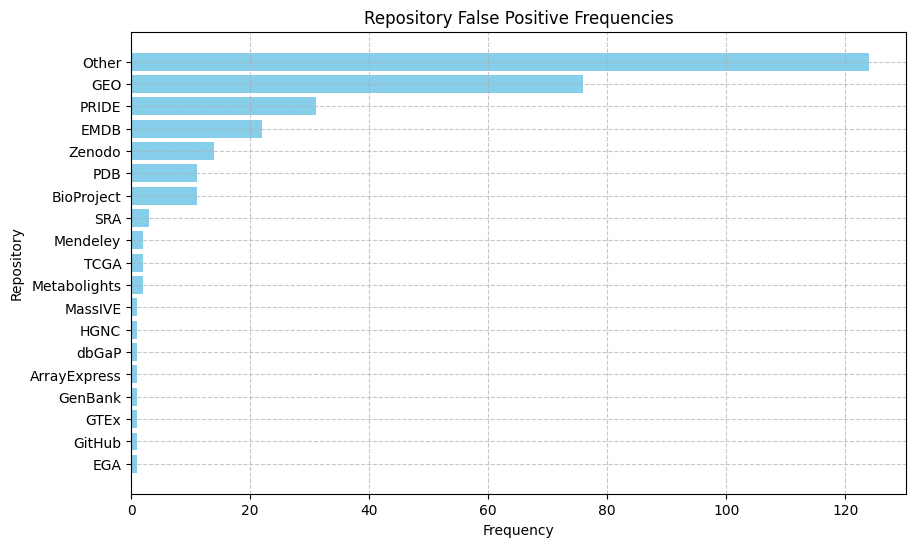

In [5]:
# Convert to DataFrame for display
repo_df = pd.DataFrame(list(repo_counts.items()), columns=['Repository', 'Frequency'])
repo_df.sort_values('Frequency', ascending=False, inplace=True)
# Display directly here# Plotting the frequencies
plt.figure(figsize=(10, 6))
plt.barh(repo_df['Repository'], repo_df['Frequency'], color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Repository')
plt.title('Repository False Positive Frequencies')
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

In [5]:
print(repo_df)

      Repository  Frequency
0            GEO         76
1          PRIDE         31
2         GitHub          1
3          Other        124
4       Mendeley          2
5           TCGA          2
6           GTEx          1
7   Metabolights          2
8     BioProject         11
9          dbGaP          1
10        Zenodo         14
11       GenBank          1
12           SRA          3
13  ArrayExpress          1
14       MassIVE          1
15          EMDB         22
16          HGNC          1
17           PDB         11
18           EGA          1
